# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

C:\Users\capoma\AppData\Local\Temp\ipykernel_16936\877008696.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# ***Load Data***

In [3]:
# mask = df['Descrip Planta'].isin(['ATICO' , 'MATARANI', 'ILO'])
# df = df[~mask]
# df.reset_index(inplace=True, drop=True)
# df.to_excel(path + '_' + file, index=False)
# df.head()

In [4]:
path = 'datasets/'
# file = 'df_all_embar.xlsx'
file = '_df_all_embar.xlsx'

df = pd.read_excel(path + file)
name_fecha = 'Fecha Arribo'
name_hora = 'Hora Arribo'
df[name_fecha] = df[name_fecha] + ' ' + df[name_hora]
df.loc[:, name_fecha] = pd.to_datetime(
            df.loc[:, name_fecha], format="%Y/%m/%d"
        )
df.head()

Marea    Descarga        Lote  Ticket Centro Descrip Planta                Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula     CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga      Punto Descarga                          Patrón Temporada
0  131281  FT17017367  FT17017367    3718   TCHI       CHIMBOTE   UBICACIONES PLANTA NORTE       2018-04-07           71            TASA 59  CO-17361-PM  570.004     NaN        Propia     CHIMBOTE  2018-04-07   00:52:00      2018-04-07       08:10:00            3.0     2018-04-07      14:45:00        2018-04-07         15:32:25      CHIMBOTE 2018-04-07 20:30:00    20:30:00     2018-04-07      21:57:00     2018-04-08      00:45:00      210.0    202.720    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE       CHATA SARIMON        CHURA MENDOZA , ASCENCIO    2018-I
1  131286  FT17017373  FT17017373    3720   TCHI       CHIMBOTE   UBICACIONES PLANTA NORTE       2018-04-07          226           TASA 424   CO-6239-PM  412.910     NaN        Propia     CHIMBOTE  2018-04-07   01:32:00      2018-04-07       08:07:00            3.0     2018-04-07      16:05:00        2018-04-07         16:25:58      CHIMBOTE 2018-04-07 21:32:00    21:32:00     2018-04-08      03:40:00     2018-04-08      05:56:00      190.0    153.825    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE       CHATA SARIMON    VASQUEZ PAULINO , JORGE LUIS    2018-I
2  131284  FP15003657  FP15003657    1065   TSAM        SAMANCO   UBICACIONES PLANTA NORTE       2018-04-07          214            TASA 42  CO-18294-PM  485.400     NaN        Propia     CHIMBOTE  2018-04-07   01:03:00      2018-04-07       08:10:00            3.0     2018-04-07      12:32:00        2018-04-07         13:26:27       SAMANCO 2018-04-07 20:40:00    20:40:00     2018-04-07      21:20:00     2018-04-08      01:51:00      340.0    341.720    Pesca CHI  ANCHOVETA                NaN            NaN           NaN  CHATA TASA SAMANCO           CHURA MENDOZA , MAURO    2018-I
3  131324  FP14009320  FP14009320    1769   TSUP           SUPE  UBICACIONES PLANTA CENTRO       2018-04-07           15            TASA 52  CO-20777-PM  604.539     NaN        Propia       CALLAO  2018-04-07   06:30:00      2018-04-07       09:00:00            5.0     2018-04-07      12:05:00        2018-04-07         12:15:28          SUPE 2018-04-07 18:40:00    18:40:00     2018-04-07      19:44:00     2018-04-08      01:29:00      440.0    451.985    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE     CHATA TASA SUPE  CLAVIJO ARREIZA , JORGE ELADIO    2018-I
4  131336  FT17017374  FT17017374    3721   TCHI       CHIMBOTE   UBICACIONES PLANTA NORTE       2018-04-07         4727          MACABI 10  CE-29416-PM  296.850     NaN       Tercera     CHIMBOTE  2018-04-06   22:00:00      2018-04-07       08:00:00            3.0     2018-04-07      14:27:32        2018-04-07         19:00:00      CHIMBOTE 2018-04-08 00:29:05    00:29:05     2018-04-08      06:20:00     2018-04-08      07:06:00       40.0     31.935    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE       CHATA SARIMON                             NaN    2018-I

In [13]:
df['year'] = df[name_fecha].dt.year
df['weekofyear'] = df[name_fecha].dt.weekofyear

df['y-m'] = df[name_fecha].apply(lambda x: '{0}-{1}'.format(x.year, x.isocalendar()[1]))
df.head()

C:\Users\capoma\AppData\Local\Temp\ipykernel_13080\2266119746.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[name_fecha].dt.weekofyear


Marea    Descarga        Lote  Ticket Centro Descrip Planta                Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula    CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga   Punto Descarga                            Patrón Temporada      diferences  dif_minutes  flg_menor  year  weekofyear  formatted_date       date      y-m
39  131298  FP11017308  FP11017308       6   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07           41           TASA 210  PT-02461-PM  295.16     NaN        Propia       CALLAO  2018-04-07   03:15:00      2018-04-07       08:20:00            5.0     2018-04-07      10:50:00        2018-04-07         12:09:44        CALLAO 2018-04-07 16:05:00    16:05:00     2018-04-07      16:41:00     2018-04-07      19:51:00      290.0    265.015    Pesca CHI  ANCHOVETA                NaN            NaN           NaN    CHATA CHILLON      QUISPE QUISPE , ELIAS JAVIER    2018-I 0 days 01:51:00        111.0          0  2018          14         2018140 2018-04-08  2018-14
19  131319  FP11017303  FP11017303       6   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07           25           TASA 111   PT-2466-PM  192.89     NaN        Propia       CALLAO  2018-04-07   04:50:00      2018-04-07       07:30:00            5.0     2018-04-07      11:50:00        2018-04-07         12:42:39        CALLAO 2018-04-07 16:19:00    16:19:00     2018-04-07      16:41:00     2018-04-07      18:39:00      190.0    182.450    Pesca CHI  ANCHOVETA                NaN            NaN           NaN    CHATA CHILLON   FIESTAS MARTINEZ , JUAN SUNCION    2018-I 0 days 00:14:00         14.0          0  2018          14         2018140 2018-04-08  2018-14
16  131289  FS13009561  FS13009561    2019   TPSU      PISCO SUR  UBICACIONES PLANTA CENTRO       2018-04-07           64           TASA 416  HO-10722-PM  430.92     NaN        Propia        PISCO  2018-04-07   01:29:00      2018-04-07       05:00:00            6.0     2018-04-07      12:00:00        2018-04-07         15:42:33         PISCO 2018-04-07 16:59:00    16:59:00     2018-04-07      19:27:00     2018-04-07      22:02:00       90.0     82.505    Pesca CHI  ANCHOVETA                NaN            NaN           NaN      CHATA EXABA  MARCIAL PLACENCIA , LUIS ALBERTO    2018-I 0 days 00:40:00         40.0          0  2018          14         2018140 2018-04-08  2018-14
42  131288  FP13007829  FP13007829    1434   TPNO    PISCO NORTE  UBICACIONES PLANTA CENTRO       2018-04-07           59           TASA 411  PS-11080-PM  454.03     NaN        Propia        PISCO  2018-04-07   01:14:00      2018-04-07       05:00:00            6.0     2018-04-07      11:40:00        2018-04-07         15:59:20         PISCO 2018-04-07 17:03:00    17:03:00     2018-04-07      19:19:00     2018-04-07      20:26:00       20.0     16.765    Pesca CHI  ANCHOVETA                NaN            NaN           NaN  CHATA TANGARARA             GOLAC GONGORA , ZENON    2018-I 0 days 00:04:00          4.0          0  2018          14         2018140 2018-04-08  2018-14
26  131322  FP11017306  FP11017306       8   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07          218           TASA 314  CE-18337-PM  352.30     NaN        Propia       CALLAO  2018-04-07   05:00:00      2018-04-07       08:37:00            5.0     2018-04-07      13:35:00        2018-04-07         14:06:33        CALLAO 2018-04-07 17:09:00    17:09:00     2018-04-07      18:21:00     2018-04-07      23:20:00      220.0    188.630    Pesca CHI  ANCHOVETA                NaN            NaN           NaN   CHATA PABLO VI          MORAN COYA , JULIO CESAR    2018-I 0

In [5]:
df.sort_values(['Ubic Planta', name_fecha], inplace=True)
df['diferences'] = np.c_[np.array([6660]), np.diff(df[name_fecha].to_numpy()).astype('timedelta64[s]').reshape(1, -1)].flatten()

name_dif_min = 'dif_minutes'
df.loc[:, name_dif_min] = df['diferences'].dt.total_seconds() / 60

df['flg_menor'] = 0
mask = df[name_dif_min] == 0
df.loc[mask, 'flg_menor'] = 1

df.head()

Marea    Descarga        Lote  Ticket Centro Descrip Planta                Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula    CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga   Punto Descarga                            Patrón Temporada      diferences  dif_minutes  flg_menor
39  131298  FP11017308  FP11017308       6   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07           41           TASA 210  PT-02461-PM  295.16     NaN        Propia       CALLAO  2018-04-07   03:15:00      2018-04-07       08:20:00            5.0     2018-04-07      10:50:00        2018-04-07         12:09:44        CALLAO 2018-04-07 16:05:00    16:05:00     2018-04-07      16:41:00     2018-04-07      19:51:00      290.0    265.015    Pesca CHI  ANCHOVETA                NaN            NaN           NaN    CHATA CHILLON      QUISPE QUISPE , ELIAS JAVIER    2018-I 0 days 01:51:00        111.0          0
19  131319  FP11017303  FP11017303       6   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07           25           TASA 111   PT-2466-PM  192.89     NaN        Propia       CALLAO  2018-04-07   04:50:00      2018-04-07       07:30:00            5.0     2018-04-07      11:50:00        2018-04-07         12:42:39        CALLAO 2018-04-07 16:19:00    16:19:00     2018-04-07      16:41:00     2018-04-07      18:39:00      190.0    182.450    Pesca CHI  ANCHOVETA                NaN            NaN           NaN    CHATA CHILLON   FIESTAS MARTINEZ , JUAN SUNCION    2018-I 0 days 00:14:00         14.0          0
16  131289  FS13009561  FS13009561    2019   TPSU      PISCO SUR  UBICACIONES PLANTA CENTRO       2018-04-07           64           TASA 416  HO-10722-PM  430.92     NaN        Propia        PISCO  2018-04-07   01:29:00      2018-04-07       05:00:00            6.0     2018-04-07      12:00:00        2018-04-07         15:42:33         PISCO 2018-04-07 16:59:00    16:59:00     2018-04-07      19:27:00     2018-04-07      22:02:00       90.0     82.505    Pesca CHI  ANCHOVETA                NaN            NaN           NaN      CHATA EXABA  MARCIAL PLACENCIA , LUIS ALBERTO    2018-I 0 days 00:40:00         40.0          0
42  131288  FP13007829  FP13007829    1434   TPNO    PISCO NORTE  UBICACIONES PLANTA CENTRO       2018-04-07           59           TASA 411  PS-11080-PM  454.03     NaN        Propia        PISCO  2018-04-07   01:14:00      2018-04-07       05:00:00            6.0     2018-04-07      11:40:00        2018-04-07         15:59:20         PISCO 2018-04-07 17:03:00    17:03:00     2018-04-07      19:19:00     2018-04-07      20:26:00       20.0     16.765    Pesca CHI  ANCHOVETA                NaN            NaN           NaN  CHATA TANGARARA             GOLAC GONGORA , ZENON    2018-I 0 days 00:04:00          4.0          0
26  131322  FP11017306  FP11017306       8   TCNO         CALLAO  UBICACIONES PLANTA CENTRO       2018-04-07          218           TASA 314  CE-18337-PM  352.30     NaN        Propia       CALLAO  2018-04-07   05:00:00      2018-04-07       08:37:00            5.0     2018-04-07      13:35:00        2018-04-07         14:06:33        CALLAO 2018-04-07 17:09:00    17:09:00     2018-04-07      18:21:00     2018-04-07      23:20:00      220.0    188.630    Pesca CHI  ANCHOVETA                NaN            NaN           NaN   CHATA PABLO VI          MORAN COYA , JULIO CESAR    2018-I 0 days 00:06:00          6.0          0

C:\Users\capoma\AppData\Local\Temp\ipykernel_13080\1348100544.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data2['semana'] = data2[name_fecha].dt.week


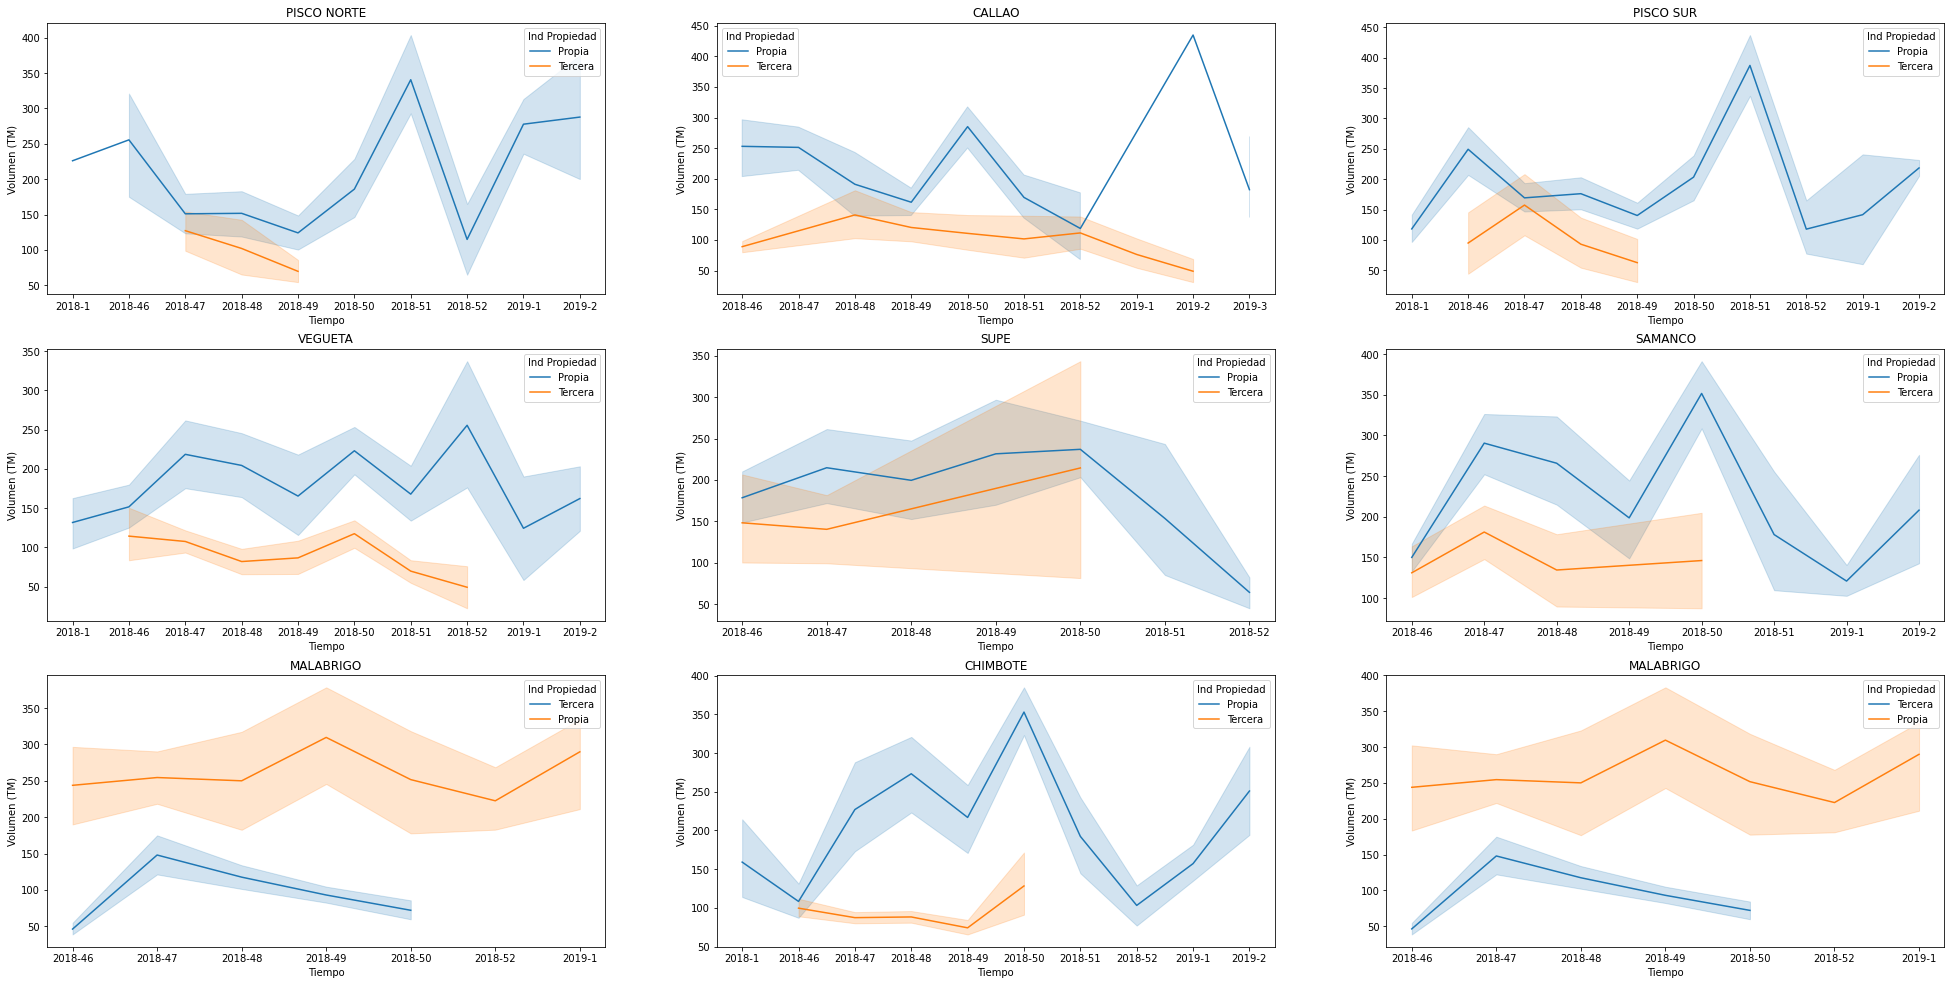

In [16]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()

mask = data2['Temporada'] == '2018-II'
data2 = data2[mask]
data2['year'] = data2[name_fecha].dt.year
data2['semana'] = data2[name_fecha].dt.week

# data2['weeknr'] = data2['semana'] + (data2['year'] - data2['year'].min())*52
data2.sort_values('y-m', inplace=True)
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'CHIMBOTE', 'MALABRIGO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.lineplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])], x='y-m', y='Pesc Desc', hue='Ind Propiedad')
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Volumen (TM)')
        ax[i, j].set_xlabel('Tiempo')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\capoma\AppData\Local\Temp\ipykernel_13080\1726559010.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data2['semana'] = data2[name_fecha].dt.week


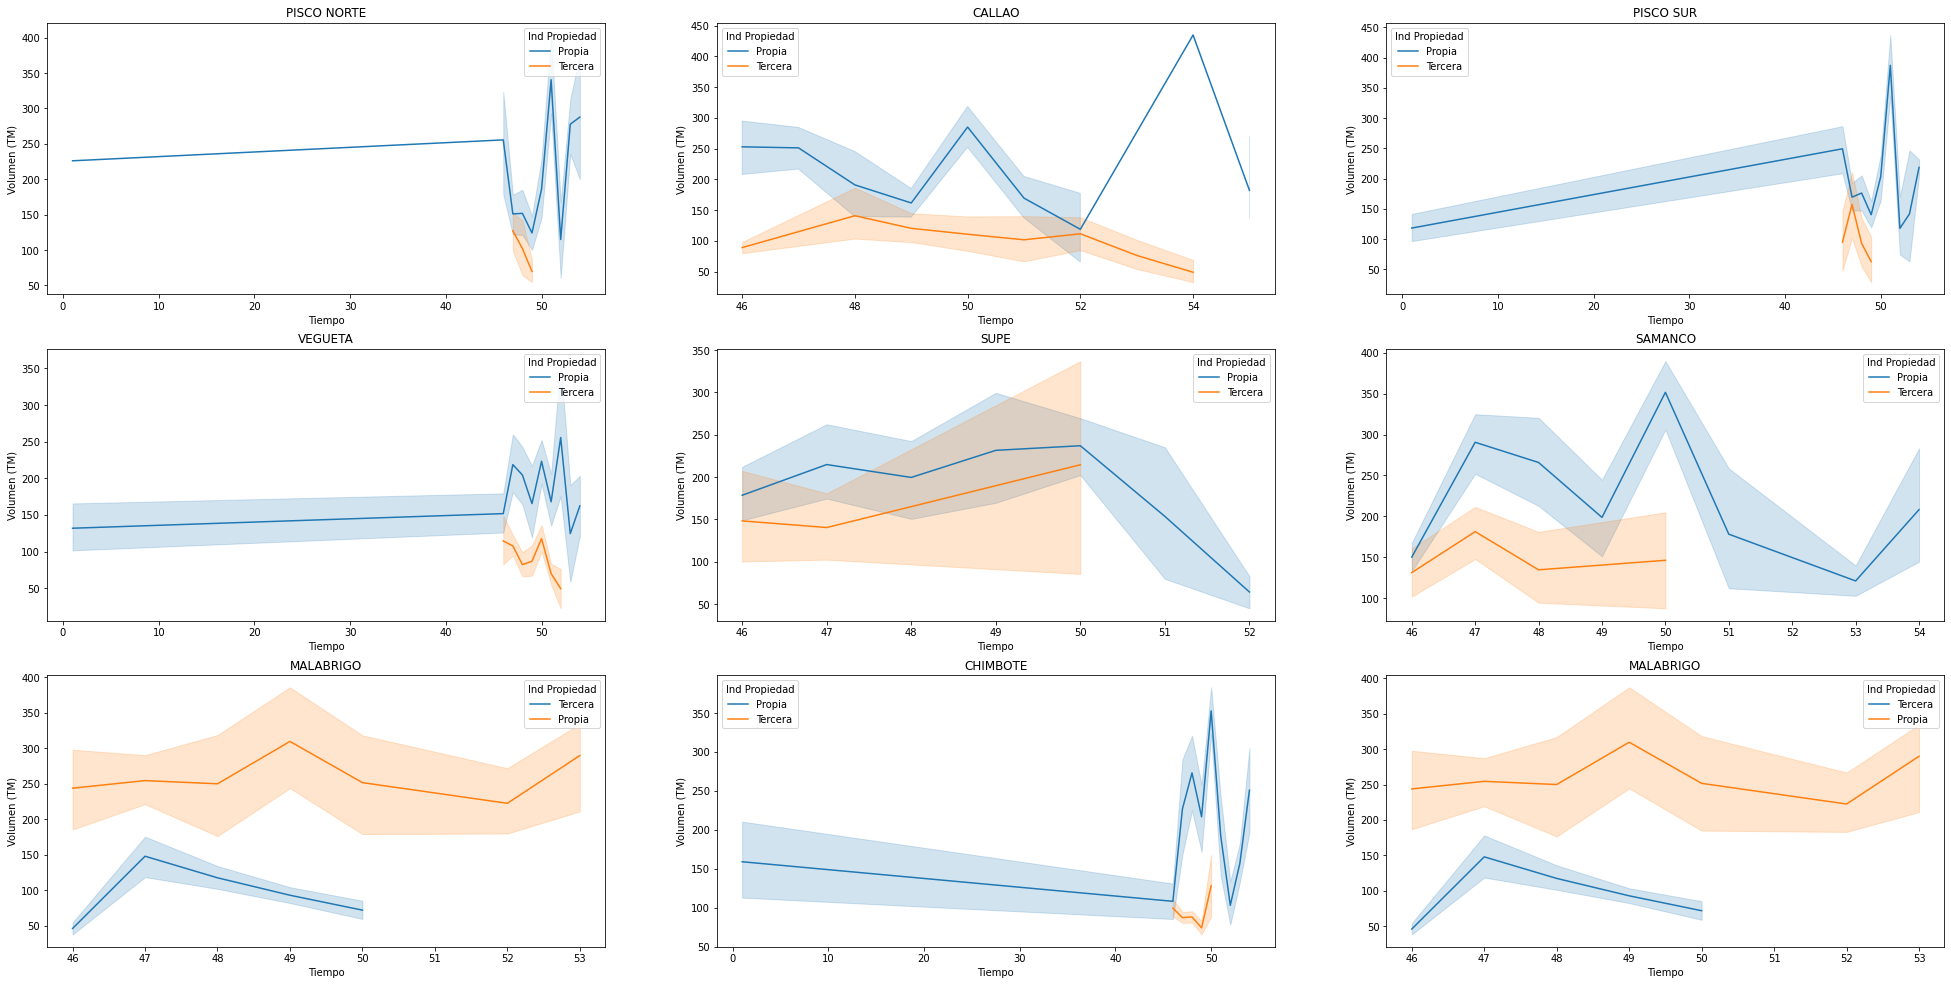

In [7]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()

mask = data2['Temporada'] == '2018-II'
data2 = data2[mask]
data2['year'] = data2[name_fecha].dt.year
data2['semana'] = data2[name_fecha].dt.week

data2['weeknr'] = data2['semana'] + (data2['year'] - data2['year'].min())*52
data2.sort_values('weeknr', inplace=True)
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'CHIMBOTE', 'MALABRIGO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.lineplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])], x='weeknr', y='Pesc Desc', hue='Ind Propiedad')
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Volumen (TM)')
        ax[i, j].set_xlabel('Tiempo')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\capoma\AppData\Local\Temp\ipykernel_19120\3309612478.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data2['semana'] = data2[name_fecha].dt.week


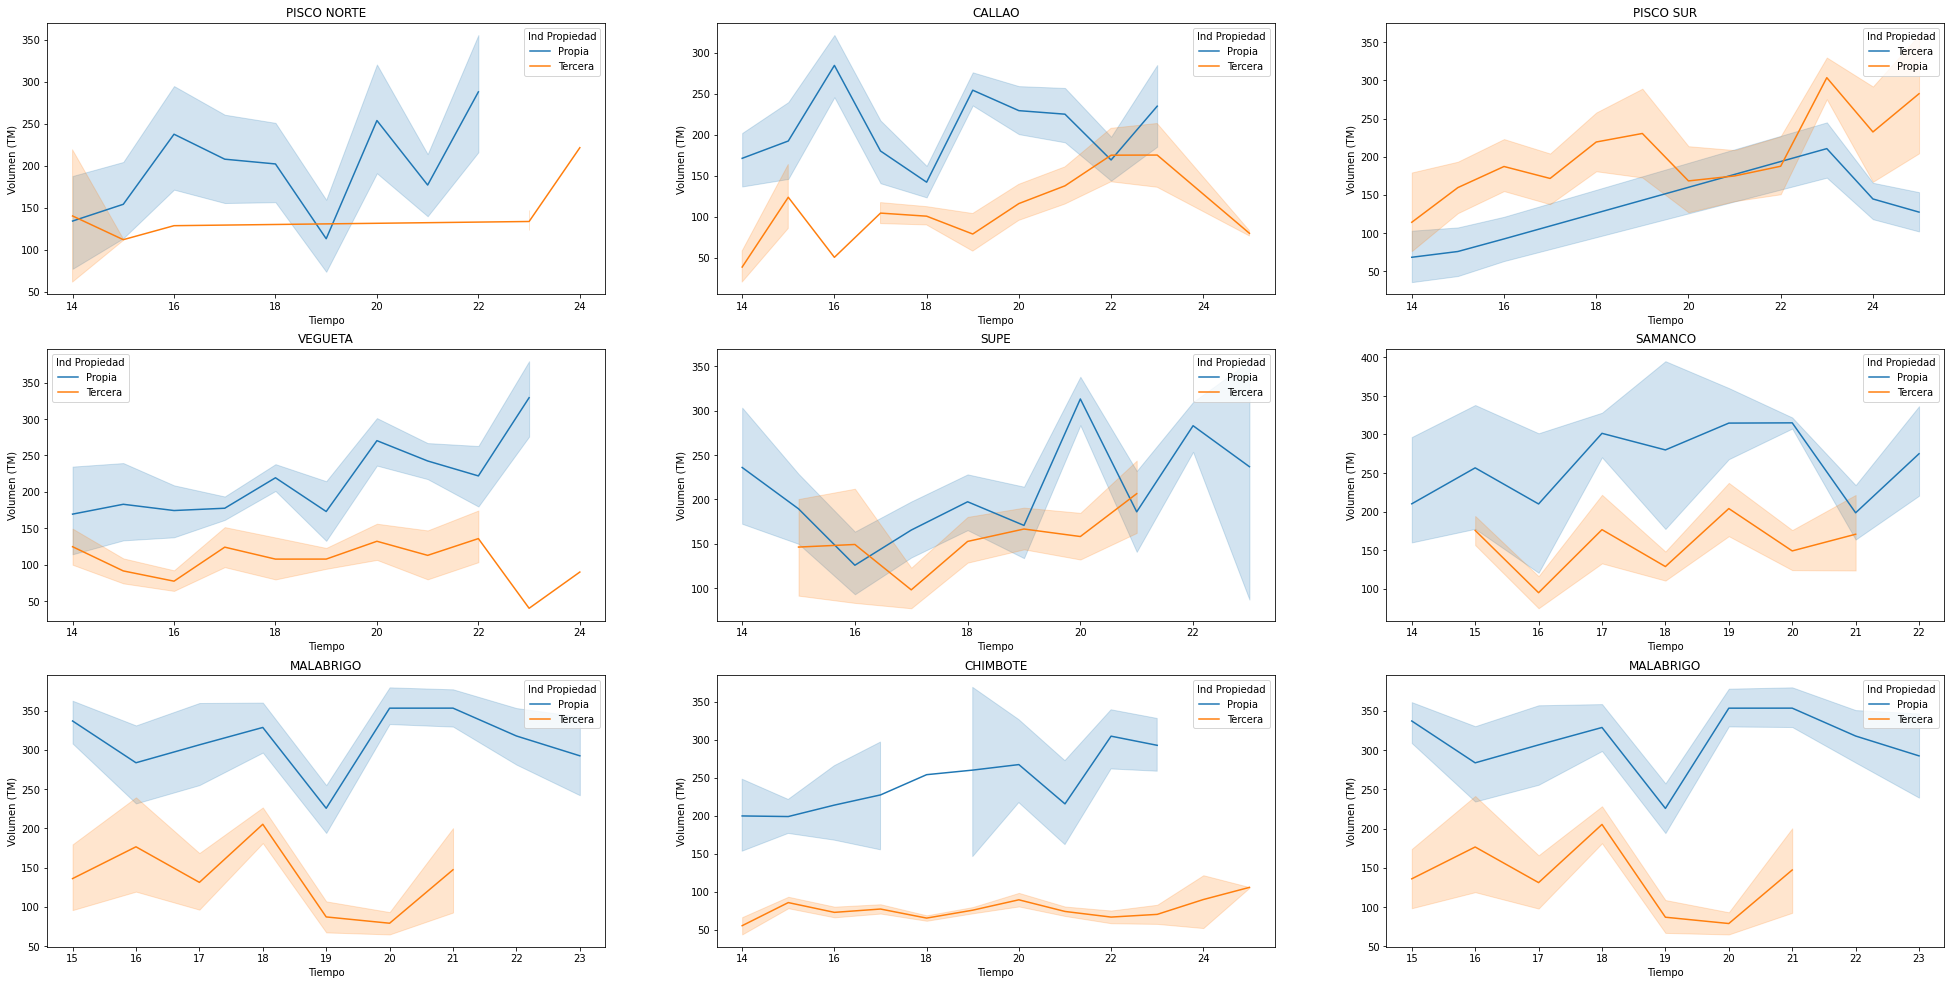

In [55]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()

mask = data2['Temporada'] == '2018-I'
data2 = data2[mask]
data2['year'] = data2[name_fecha].dt.year
data2['semana'] = data2[name_fecha].dt.week

data2['weeknr'] = data2['semana'] + (data2['year'] - data2['year'].min())*52
data2.sort_values('weeknr', inplace=True)
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'CHIMBOTE', 'MALABRIGO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.lineplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])], x='weeknr', y='Pesc Desc', hue='Ind Propiedad')
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Volumen (TM)')
        ax[i, j].set_xlabel('Tiempo')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

In [91]:
df.groupby(['Descrip Planta', 'flg_menor'])['Marea'].count() / df.groupby(['Descrip Planta'])['Marea'].count()

Descrip Planta  flg_menor
ATICO           0            0.950216
                1            0.049784
CALLAO          0            0.952404
                1            0.047596
CHIMBOTE        0            0.940018
                1            0.059982
ILO             0            1.000000
MALABRIGO       0            0.966504
                1            0.033496
MATARANI        0            0.958556
                1            0.041444
PISCO NORTE     0            0.955645
                1            0.044355
PISCO SUR       0            0.959145
                1            0.040855
SAMANCO         0            0.946708
                1            0.053292
SUPE            0            0.950240
                1            0.049760
VEGUETA         0            0.961517
                1            0.038483
Name: Marea, dtype: float64

In [92]:
df['Descrip Planta'].value_counts(dropna=False)

CHIMBOTE       7969
MALABRIGO      6359
CALLAO         4139
VEGUETA        3586
SUPE           1668
PISCO SUR      1591
MATARANI       1496
SAMANCO        1276
ATICO           924
PISCO NORTE     496
ILO               5
Name: Descrip Planta, dtype: int64

In [93]:
df['Ind Propiedad'].value_counts(dropna=False)

Tercera    15904
Propia     13605
Name: Ind Propiedad, dtype: int64

In [94]:
df['dif_minutes'].describe(percentiles=np.arange(0, 1, 0.01))

count    2.950900e+04
mean     6.809211e+01
std      1.734514e+04
min     -1.968753e+06
0%      -1.968753e+06
             ...     
96%      2.770000e+02
97%      4.447600e+02
98%      6.807387e+02
99%      9.785520e+02
max      6.951500e+05
Name: dif_minutes, Length: 105, dtype: float64

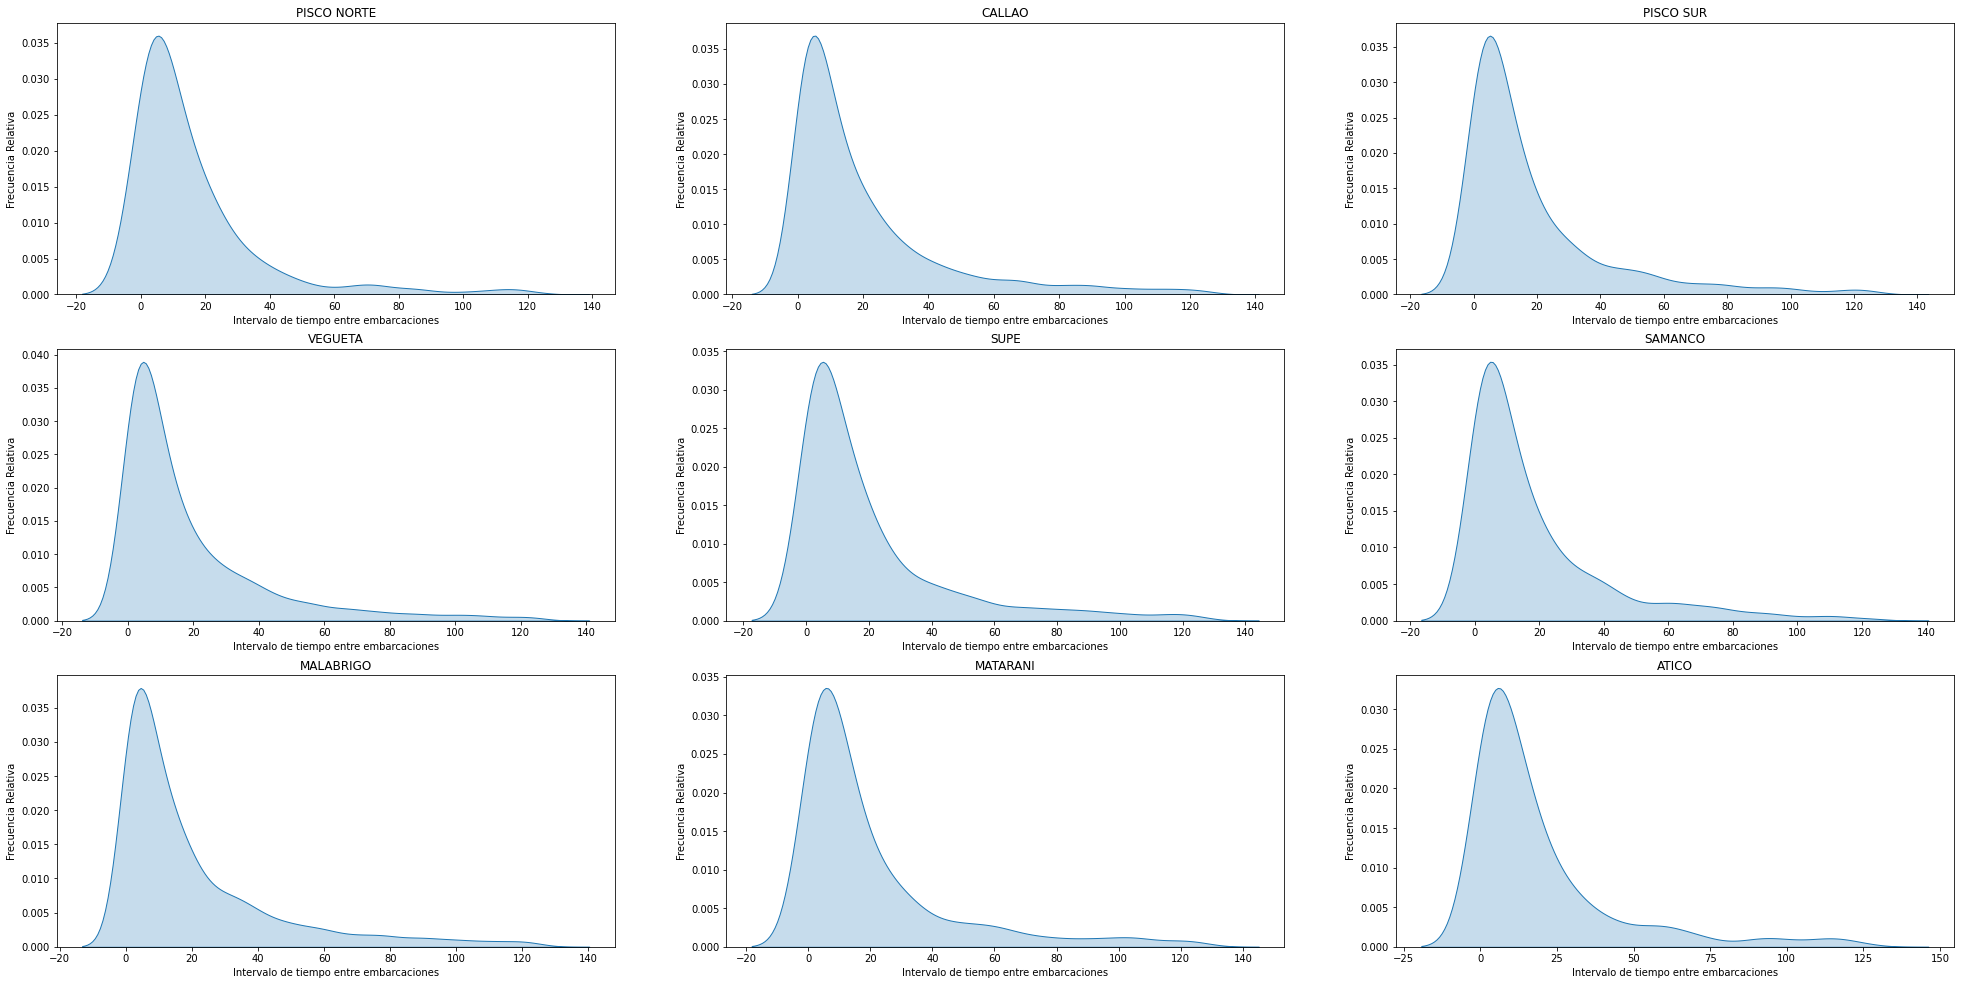

In [95]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'MATARANI', 'ATICO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.kdeplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", fill=True)
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Frecuencia Relativa')
        ax[i, j].set_xlabel('Intervalo de tiempo entre embarcaciones')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

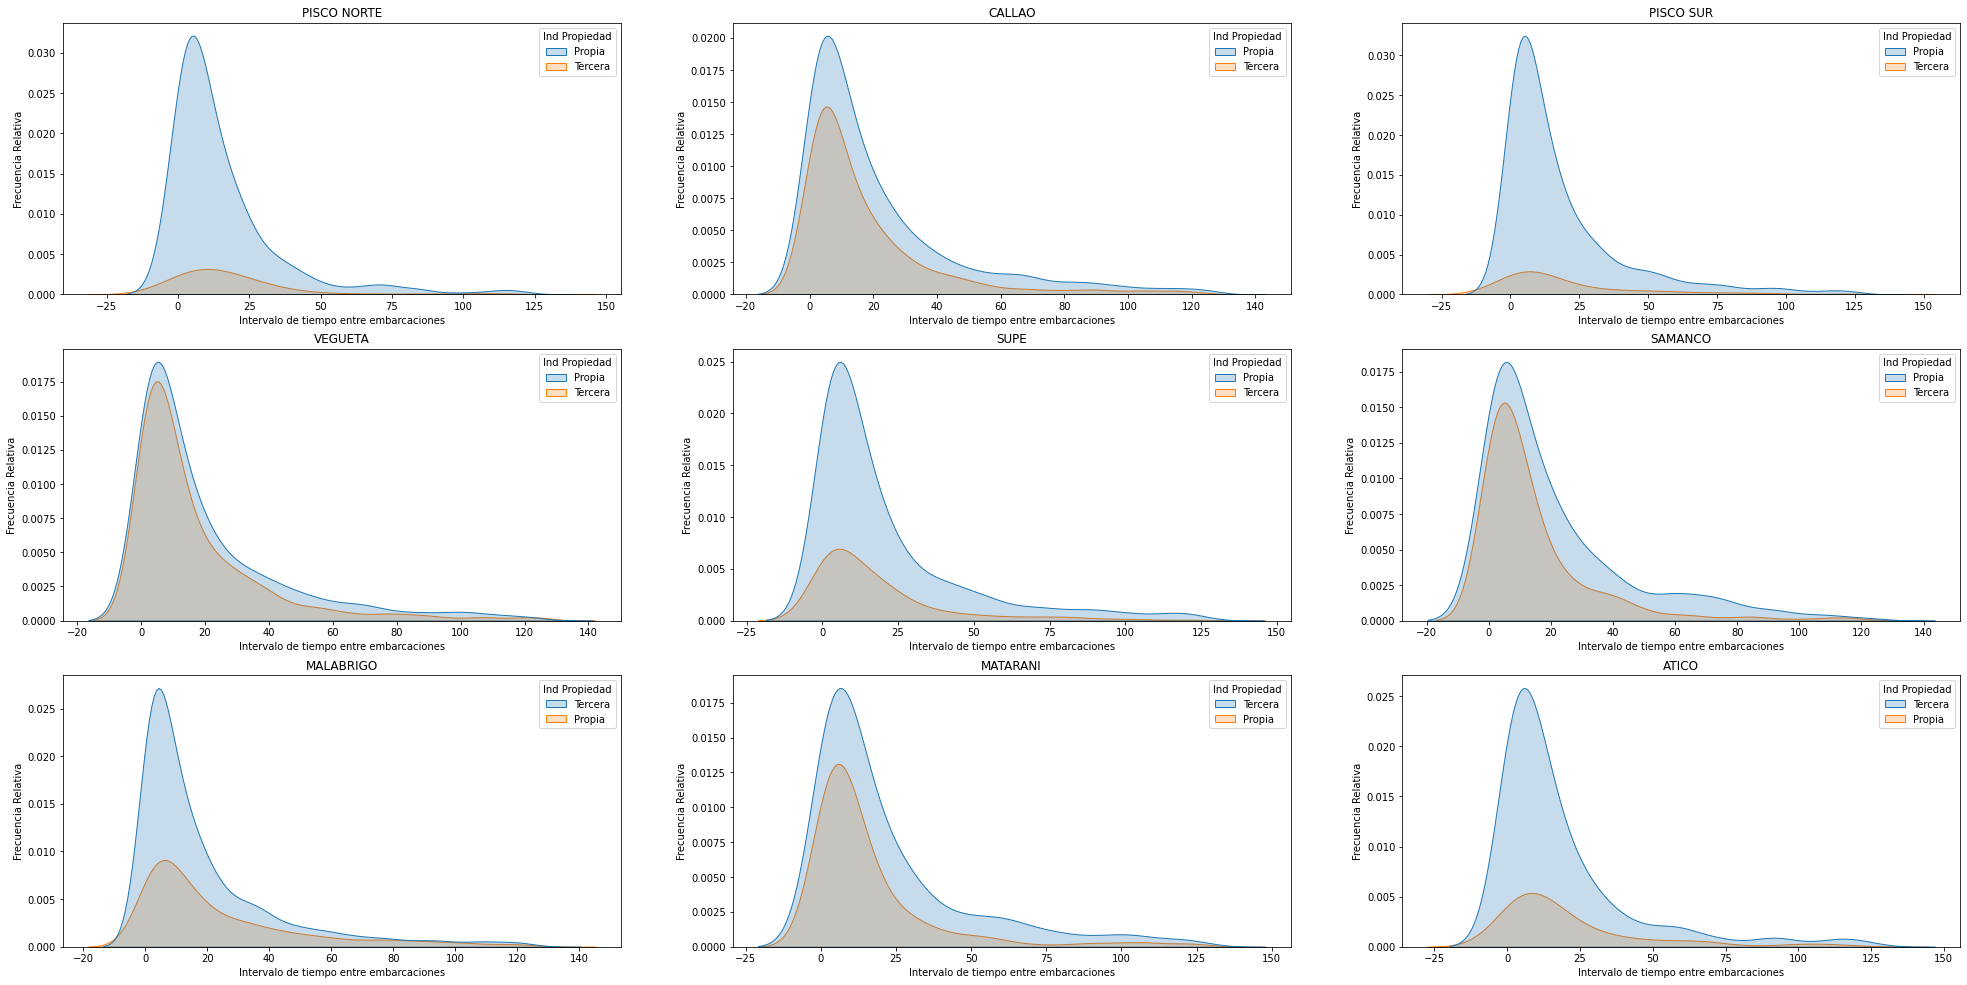

In [96]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'MATARANI', 'ATICO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.kdeplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", hue="Ind Propiedad", fill=True)
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Frecuencia Relativa')
        ax[i, j].set_xlabel('Intervalo de tiempo entre embarcaciones')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

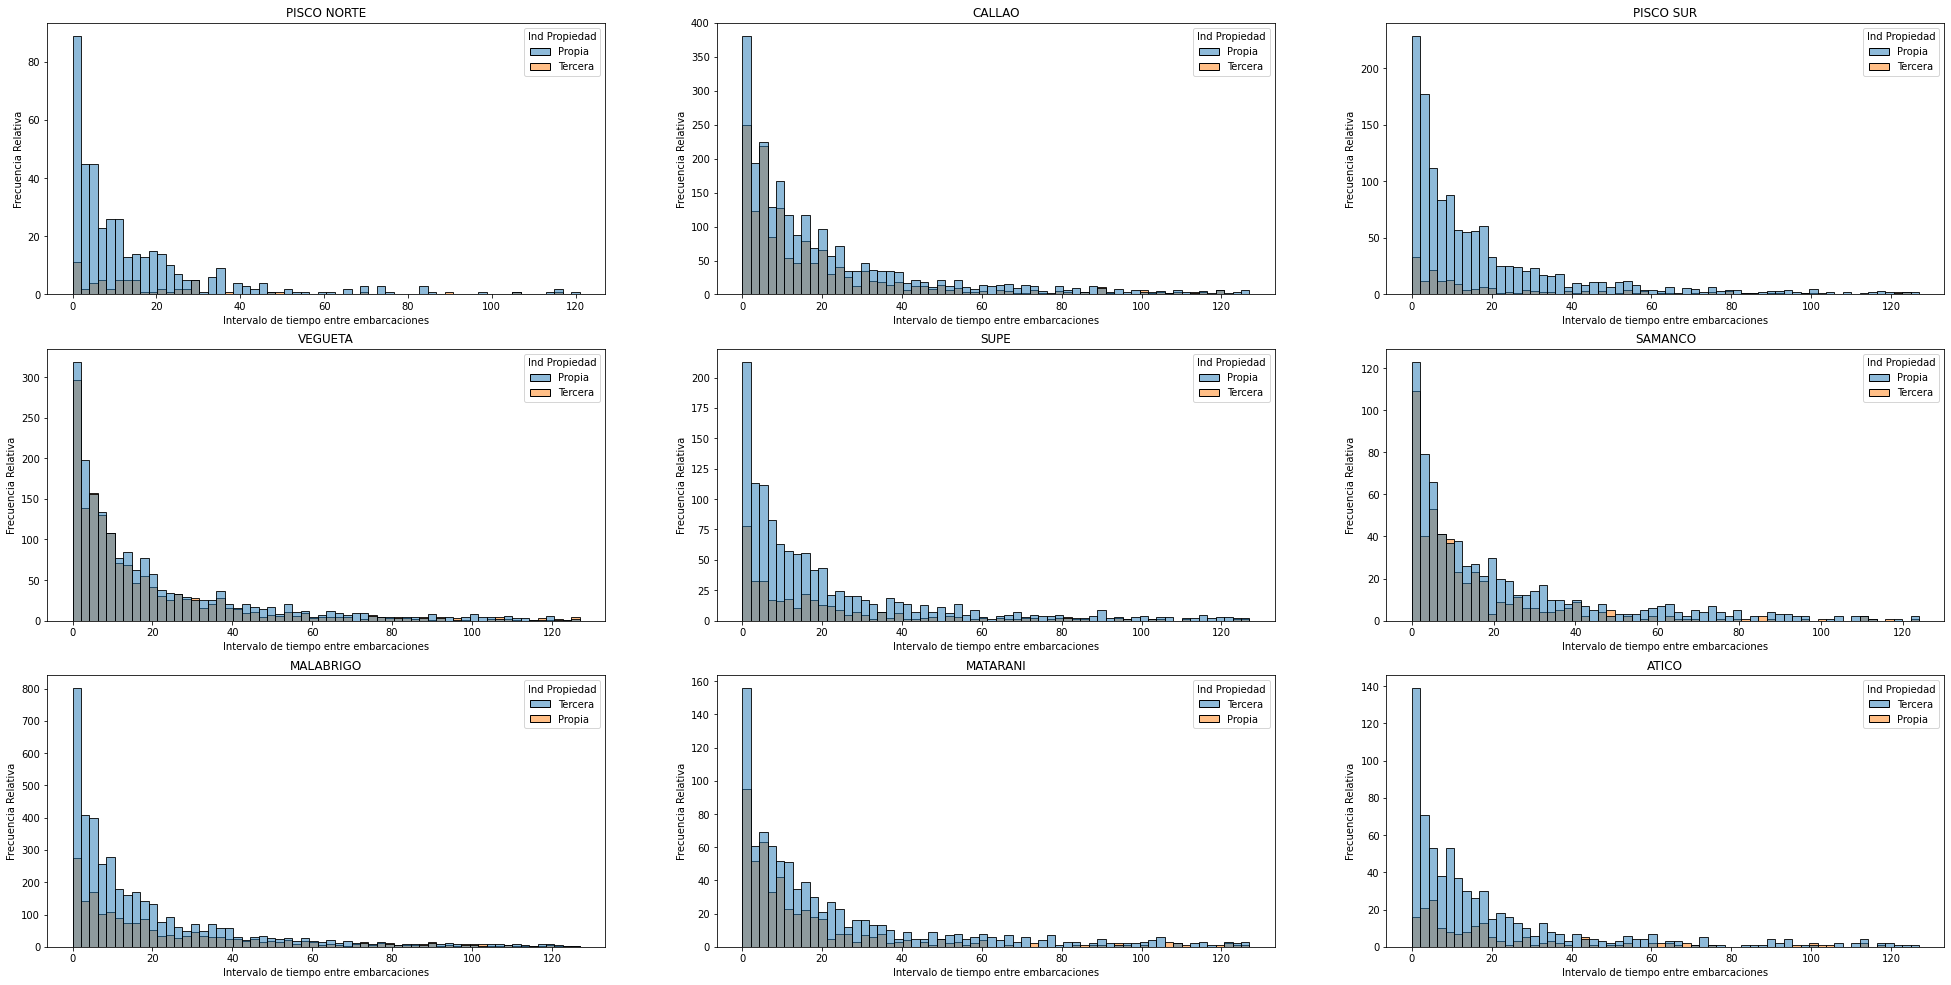

In [97]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'MATARANI', 'ATICO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        # sns.kdeplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", hue="Ind Propiedad", fill=True)
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Frecuencia Relativa')
        ax[i, j].set_xlabel('Intervalo de tiempo entre embarcaciones')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

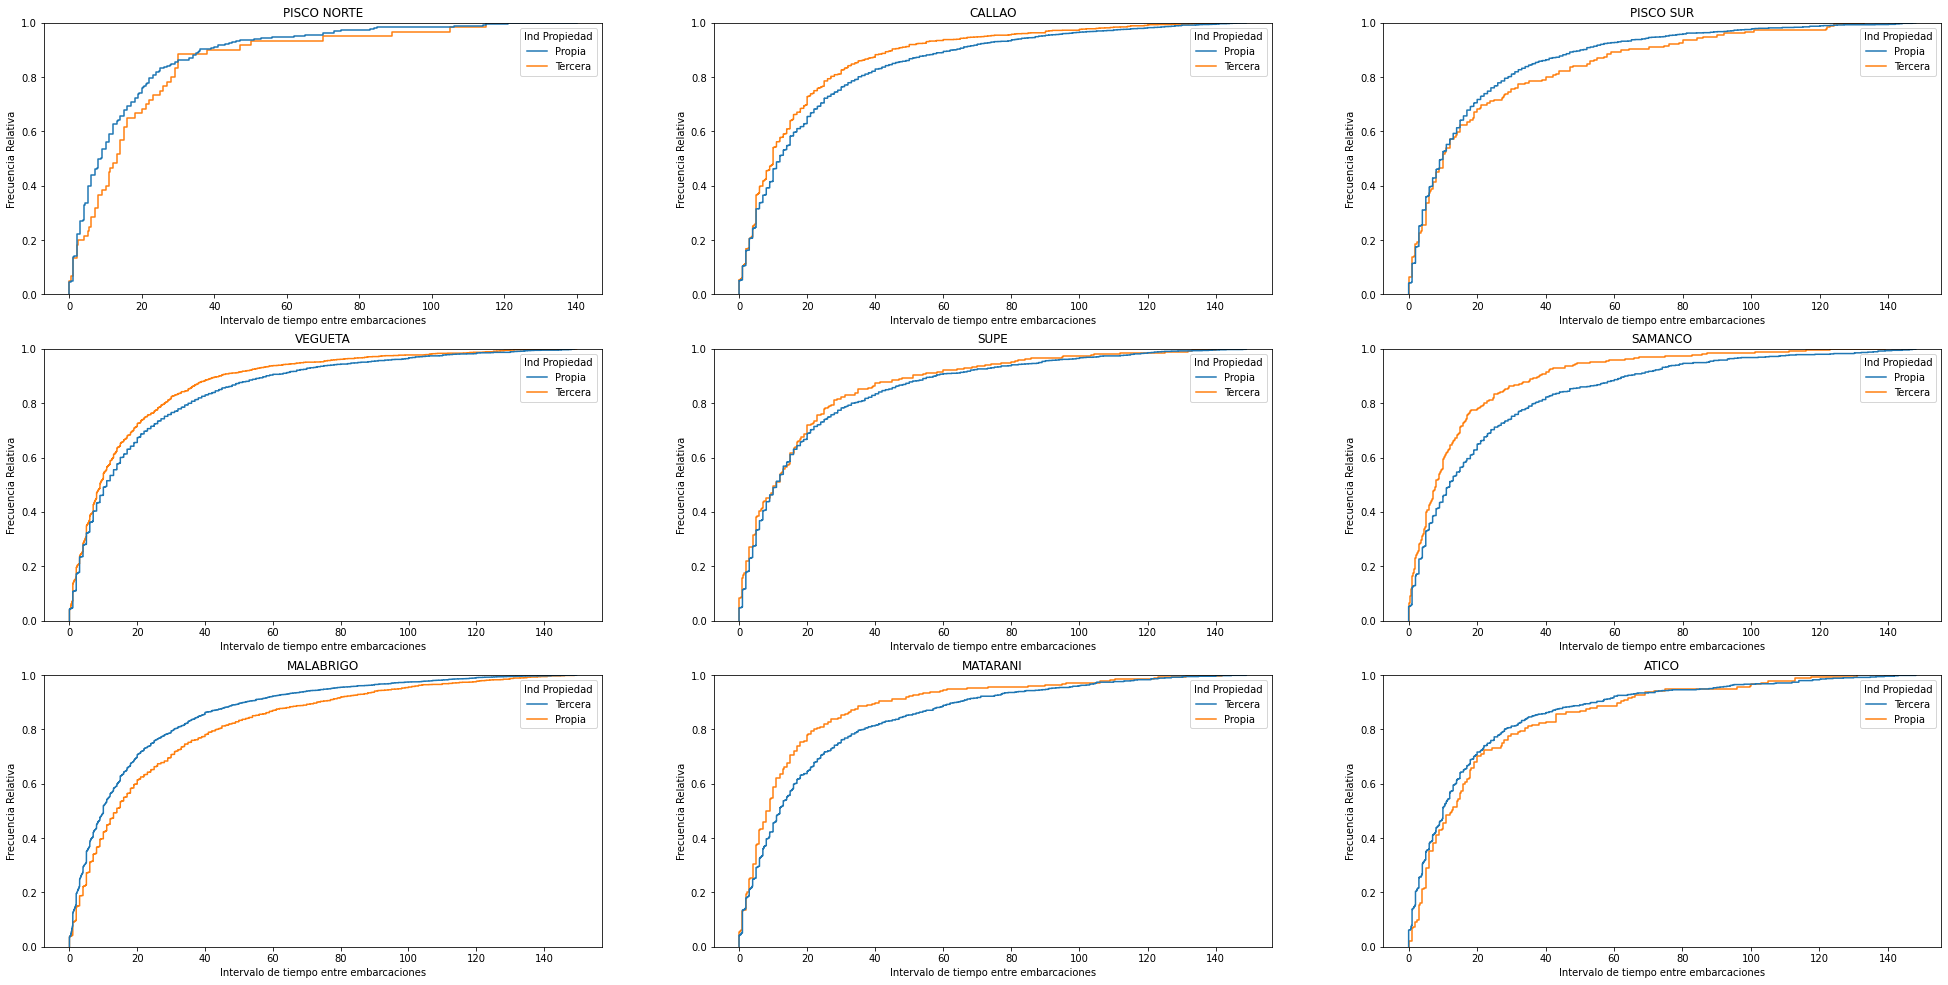

In [59]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'MATARANI', 'ATICO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        sns.ecdfplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 150)], x="dif_minutes", hue="Ind Propiedad")
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Frecuencia Relativa')
        ax[i, j].set_xlabel('Intervalo de tiempo entre embarcaciones')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
plantas = ['ILO', 'CHIMBOTE', 'SAMANCO', 'SUPE', 'PISCO SUR', 'CALLAO',
       'VEGUETA', 'PISCO NORTE', 'MALABRIGO', 'MATARANI', 'ATICO'],
name_plant = 'Descrip Planta'

planta = 'MALABRIGO'

In [5]:

mask = df[name_plant] == planta
df_cur = df[mask]
df_cur.sort_values(name_fecha, inplace=True)
df_cur['diferences'] = np.c_[np.array([6660]), np.diff(df_cur[name_fecha].to_numpy()).astype('timedelta64[s]').reshape(1, -1)].flatten()

name_dif_min = 'dif_minutes'
df_cur.loc[:, name_dif_min] = df_cur['diferences'].dt.total_seconds() / 60

df_cur[name_dif_min + '_bucket'] = pd.cut(df_cur[name_dif_min],  bins=[0, 0.1,10, 20, 30, 60, 120, 240, np.inf], right=False )

df_cur.head()

C:\Users\capoma\AppData\Local\Temp\ipykernel_2172\465260782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cur.sort_values(name_fecha, inplace=True)
C:\Users\capoma\AppData\Local\Temp\ipykernel_2172\465260782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cur['diferences'] = np.c_[np.array([6660]), np.diff(df_cur[name_fecha].to_numpy()).astype('timedelta64[s]').reshape(1, -1)].flatten()
C:\Users\capoma\AppData\Local\Temp\ipykernel_2172\465260782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Marea    Descarga        Lote  Ticket Centro Descrip Planta               Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula    CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga    Punto Descarga                          Patrón      diferences  dif_minutes dif_minutes_bucket
175  131468  FP16019429  FP16019429    1935   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09          294           MACABI 9   CE-0227-PM  294.77     NaN       Tercera     CHIMBOTE  2018-04-09   01:00:00      2018-04-09       05:00:00            3.0     2018-04-09      10:24:00        2018-04-09         15:23:37       CHICAMA 2018-04-09 22:40:00    22:40:00     2018-04-09      23:26:00     2018-04-10      02:36:00      100.0     83.360    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA FERROLES 4                             NaN 0 days 01:51:00        111.0      [60.0, 120.0)
134  131462  FP16019426  FP16019426    1951   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09           70            TASA 58  CO-17057-PM  590.57     NaN        Propia      SAMANCO  2018-04-09   03:00:00      2018-04-09       06:30:00            3.0     2018-04-09      09:44:00        2018-04-09         15:10:55       CHICAMA 2018-04-09 22:45:00    22:45:00     2018-04-09      23:26:00     2018-04-10      05:09:00      430.0    397.275    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE      CHATA GUANAY  CARCAMO MARQUEZ , JOSE ANTONIO 0 days 00:05:00          5.0        [0.1, 10.0)
177  131493  FP16019430  FP16019430    1936   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09         4727          MACABI 10  CE-29416-PM  296.85     NaN       Tercera     CHIMBOTE  2018-04-09   07:00:00      2018-04-09       10:00:00            3.0     2018-04-09      15:00:00        2018-04-09         15:25:19       CHICAMA 2018-04-09 22:45:00    22:45:00     2018-04-10      02:52:00     2018-04-10      04:45:00       90.0     77.885    Pesca CHI  ANCHOVETA                NaN            NaN           NaN  CHATA FERROLES 4                             NaN 0 days 00:00:00          0.0         [0.0, 0.1)
196  131446  FP16019427  FP16019427    2175   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09           22            TASA 54  CO-13008-PM  578.50     NaN        Propia      SAMANCO  2018-04-09   00:45:00      2018-04-09       04:00:00            3.0     2018-04-09      15:20:00        2018-04-09         15:46:55       CHICAMA 2018-04-09 22:50:00    22:50:00     2018-04-09      23:40:00     2018-04-10      05:32:00      420.0    398.185    Pesca CHI  ANCHOVETA                NaN            NaN           SUR  CHATA FERROLES 4         PERICHE PURIZACA , JUAN 0 days 00:05:00          5.0        [0.1, 10.0)
254  131570  FP16019434  FP16019434    1938   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-10          294           MACABI 9   CE-0227-PM  294.77     NaN       Tercera      CHICAMA  2018-04-10   01:00:00      2018-04-10       05:00:00            3.0     2018-04-10      11:25:00        2018-04-10         11:41:05       CHICAMA 2018-04-10 14:50:00    14:50:00     2018-04-10      15:21:00     2018-04-10      19:01:00      290.0    295.205    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA FERROLES 4                             NaN 0 days 16:00:00        960.0       [240.0, inf)

In [6]:
df_cur.groupby(['dif_minutes_bucket'])['Marea'].count()

dif_minutes_bucket
[0.0, 0.1)         167
[0.1, 10.0)       1975
[10.0, 20.0)      1050
[20.0, 30.0)       590
[30.0, 60.0)      1033
[60.0, 120.0)      654
[120.0, 240.0)     379
[240.0, inf)       511
Name: Marea, dtype: int64

In [7]:
df_cur['dif_minutes_bucket'].value_counts(dropna=False)

[0.1, 10.0)       1975
[10.0, 20.0)      1050
[30.0, 60.0)      1033
[60.0, 120.0)      654
[20.0, 30.0)       590
[240.0, inf)       511
[120.0, 240.0)     379
[0.0, 0.1)         167
Name: dif_minutes_bucket, dtype: int64

In [8]:
# Threshold inteval in minutes
threshold = 200 
mask = df_cur[name_dif_min] < threshold

name_flag_colas = 'flag_colas'
df_cur[name_flag_colas] = 0 
df_cur.loc[mask, name_flag_colas] = 1
df_cur.reset_index(inplace=True, drop=True)
df_cur.head()

C:\Users\capoma\AppData\Local\Temp\ipykernel_9920\754790281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cur[name_flag_colas] = 0


Marea    Descarga        Lote  Ticket Centro Descrip Planta               Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula    CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga    Punto Descarga                          Patrón      diferences  dif_minutes dif_minutes_bucket  flag_colas
0  131468  FP16019429  FP16019429    1935   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09          294           MACABI 9   CE-0227-PM  294.77     NaN       Tercera     CHIMBOTE  2018-04-09   01:00:00      2018-04-09       05:00:00            3.0     2018-04-09      10:24:00        2018-04-09         15:23:37       CHICAMA 2018-04-09 22:40:00    22:40:00     2018-04-09      23:26:00     2018-04-10      02:36:00      100.0     83.360    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA FERROLES 4                             NaN 0 days 01:51:00        111.0      [60.0, 120.0)           1
1  131462  FP16019426  FP16019426    1951   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09           70            TASA 58  CO-17057-PM  590.57     NaN        Propia      SAMANCO  2018-04-09   03:00:00      2018-04-09       06:30:00            3.0     2018-04-09      09:44:00        2018-04-09         15:10:55       CHICAMA 2018-04-09 22:45:00    22:45:00     2018-04-09      23:26:00     2018-04-10      05:09:00      430.0    397.275    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE      CHATA GUANAY  CARCAMO MARQUEZ , JOSE ANTONIO 0 days 00:05:00          5.0        [0.1, 10.0)           1
2  131493  FP16019430  FP16019430    1936   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09         4727          MACABI 10  CE-29416-PM  296.85     NaN       Tercera     CHIMBOTE  2018-04-09   07:00:00      2018-04-09       10:00:00            3.0     2018-04-09      15:00:00        2018-04-09         15:25:19       CHICAMA 2018-04-09 22:45:00    22:45:00     2018-04-10      02:52:00     2018-04-10      04:45:00       90.0     77.885    Pesca CHI  ANCHOVETA                NaN            NaN           NaN  CHATA FERROLES 4                             NaN 0 days 00:00:00          0.0         [0.0, 0.1)           1
3  131446  FP16019427  FP16019427    2175   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-09           22            TASA 54  CO-13008-PM  578.50     NaN        Propia      SAMANCO  2018-04-09   00:45:00      2018-04-09       04:00:00            3.0     2018-04-09      15:20:00        2018-04-09         15:46:55       CHICAMA 2018-04-09 22:50:00    22:50:00     2018-04-09      23:40:00     2018-04-10      05:32:00      420.0    398.185    Pesca CHI  ANCHOVETA                NaN            NaN           SUR  CHATA FERROLES 4         PERICHE PURIZACA , JUAN 0 days 00:05:00          5.0        [0.1, 10.0)           1
4  131570  FP16019434  FP16019434    1938   TMSU      MALABRIGO  UBICACIONES PLANTA NORTE       2018-04-10          294           MACABI 9   CE-0227-PM  294.77     NaN       Tercera      CHICAMA  2018-04-10   01:00:00      2018-04-10       05:00:00            3.0     2018-04-10      11:25:00        2018-04-10         11:41:05       CHICAMA 2018-04-10 14:50:00    14:50:00     2018-04-10      15:21:00     2018-04-10      19:01:00      290.0    295.205    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA FERROLES 4                             NaN 0 days 16:00:00        960.0       [240.0, inf)           0

In [33]:
df_cur.loc[:, 'new_date'] = np.nan
df_cur.loc[0, 'flag_colas'] = 0
mask = df_cur['flag_colas'] == 0

df_cur.loc[mask, 'new_date'] = df_cur.loc[mask, 'Fecha Arribo']

df_cur.loc[:, 'Solo Fecha Arribo'] = df_cur.loc[:, 'Fecha Arribo'].dt.date

df_cur.head()

C:\Users\capoma\AppData\Local\Temp\ipykernel_10148\3129866761.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\capoma\AppData\Local\Temp\ipykernel_10148\3129866761.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\capoma\AppData\Local\Temp\ipykernel_10148\3129866761.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Marea    Descarga        Lote  Ticket Centro Descrip Planta               Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula     CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga Punto Descarga                           Patrón      diferences  dif_minutes dif_minutes_bucket  flag_colas             new_date Solo Fecha Arribo
0  131343  FT17017360  FT17017360    4508   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         4241    ROSA MARIA MS-4  PL-28538-PM   88.300     NaN       Tercera     CHIMBOTE  2018-04-07   00:05:00      2018-04-07       05:00:00            3.0     2018-04-07      14:50:47        2018-04-07         12:10:00      CHIMBOTE 2018-04-07 14:58:31    14:58:31     2018-04-07      16:59:00     2018-04-07      17:41:00       85.0     77.855    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN                              NaN 0 days 01:51:00   111.000000      [60.0, 120.0)           0  2018-04-07 14:58:31        2018-04-07
1  131342  FT17017361  FT17017361    4509   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         1918            MI JUAN   PL-2265-CM   85.260     NaN       Tercera     CHIMBOTE  2018-04-07   00:12:00      2018-04-07       05:00:00            3.0     2018-04-07      12:15:00        2018-04-07         12:25:46      CHIMBOTE 2018-04-07 17:09:16    17:09:16     2018-04-07      17:44:00     2018-04-07      18:34:00       85.0     85.535    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN                              NaN 0 days 02:10:45   130.750000     [120.0, 240.0)           1                  NaN        2018-04-07
2  131293  FT17017365  FT17017365    4510   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07          227           TASA 315   PS-1852-PM  366.950     NaN        Propia     CHIMBOTE  2018-04-07   01:48:00      2018-04-07       03:00:00            3.0     2018-04-07      12:48:00        2018-04-07         13:27:23      CHIMBOTE 2018-04-07 18:18:00    18:18:00     2018-04-07      18:54:00     2018-04-07      21:44:00      250.0    245.435    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN  UCAÑAN SANCHEZ , MANUEL ALBERTO 0 days 01:08:44    68.733333      [60.0, 120.0)           1                  NaN        2018-04-07
3  131340  FT17017364  FT17017364    3717   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         3913    MI JESUS SANTOS  PT-51907-PM   75.940     NaN       Tercera     CHIMBOTE  2018-04-07   09:00:00      2018-04-07       14:23:45            3.0     2018-04-07      18:01:01        2018-04-07         18:02:55      CHIMBOTE 2018-04-07 20:08:47    20:08:47     2018-04-07      20:30:00     2018-04-07      21:25:00       80.0     72.810    Pesca CHI  ANCHOVETA                NaN            NaN           SUR  CHATA SARIMON                              NaN 0 days 01:50:47   110.783333      [60.0, 120.0)           1                  NaN        2018-04-07
4  131281  FT17017367  FT17017367    3718   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07           71            TASA 59  CO-17361-PM  570.004     NaN        Propia     CHIMBOTE  2018-04-07   00:52:00      2018-04-07       08:10:00            3.0     2018-04-07      14:45:00        2018-04-07         15:32:25      CHIMBOTE 2018-04-07 20:30:00    20:30:00     2018-04-07      21:57:00     2018-04-08      00:45:00      210.0    202.720    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA SARIMON         CHURA MENDOZA , ASCENCIO 0 days 00:21:13    21.216667       [20.0, 30.0)           1

In [9]:
fig = px.line(df, x='Solo Fecha Arribo', y='cont')
fig.show()

In [10]:
df_cur.head()

Marea    Descarga        Lote  Ticket Centro Descrip Planta               Ubic Planta Fecha Produccion  Embarcacion Nombre Embarcacion    Matricula     CBOD Armador Ind Propiedad Puerto Zarpe Fecha Zarpe Hora Zarpe Fecha Lleg Zona Hora Lleg Zona  Zona de Pesca Fecha Ult Cala Hora Ult Cala Fecha Salida Zona Hora Salida Zona Puerto Arribo        Fecha Arribo Hora Arribo Fecha Ini Desc Hora Ini Desc Fecha Fin Desc Hora Fin Desc  Pesc Decl  Pesc Desc Motivo Marea    Especie  Motivo Limitacion  Descrip Bomba Lado Descarga Punto Descarga                           Patrón      diferences  dif_minutes  flag_colas             new_date Solo Fecha Arribo  cont
0  131343  FT17017360  FT17017360    4508   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         4241    ROSA MARIA MS-4  PL-28538-PM   88.300     NaN       Tercera     CHIMBOTE  2018-04-07   00:05:00      2018-04-07       05:00:00            3.0     2018-04-07      14:50:47        2018-04-07         12:10:00      CHIMBOTE 2018-04-07 14:58:31    14:58:31     2018-04-07      16:59:00     2018-04-07      17:41:00       85.0     77.855    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN                              NaN 0 days 02:10:45   130.750000           0  2018-04-07 14:58:31        2018-04-07     1
1  131342  FT17017361  FT17017361    4509   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         1918            MI JUAN   PL-2265-CM   85.260     NaN       Tercera     CHIMBOTE  2018-04-07   00:12:00      2018-04-07       05:00:00            3.0     2018-04-07      12:15:00        2018-04-07         12:25:46      CHIMBOTE 2018-04-07 17:09:16    17:09:16     2018-04-07      17:44:00     2018-04-07      18:34:00       85.0     85.535    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN                              NaN 0 days 01:08:44    68.733333           1                  NaN        2018-04-07     1
2  131293  FT17017365  FT17017365    4510   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07          227           TASA 315   PS-1852-PM  366.950     NaN        Propia     CHIMBOTE  2018-04-07   01:48:00      2018-04-07       03:00:00            3.0     2018-04-07      12:48:00        2018-04-07         13:27:23      CHIMBOTE 2018-04-07 18:18:00    18:18:00     2018-04-07      18:54:00     2018-04-07      21:44:00      250.0    245.435    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA TAMAKUN  UCAÑAN SANCHEZ , MANUEL ALBERTO 0 days 01:50:47   110.783333           1                  NaN        2018-04-07     1
3  131340  FT17017364  FT17017364    3717   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07         3913    MI JESUS SANTOS  PT-51907-PM   75.940     NaN       Tercera     CHIMBOTE  2018-04-07   09:00:00      2018-04-07       14:23:45            3.0     2018-04-07      18:01:01        2018-04-07         18:02:55      CHIMBOTE 2018-04-07 20:08:47    20:08:47     2018-04-07      20:30:00     2018-04-07      21:25:00       80.0     72.810    Pesca CHI  ANCHOVETA                NaN            NaN           SUR  CHATA SARIMON                              NaN 0 days 00:21:13    21.216667           1                  NaN        2018-04-07     1
4  131281  FT17017367  FT17017367    3718   TCHI       CHIMBOTE  UBICACIONES PLANTA NORTE       2018-04-07           71            TASA 59  CO-17361-PM  570.004     NaN        Propia     CHIMBOTE  2018-04-07   00:52:00      2018-04-07       08:10:00            3.0     2018-04-07      14:45:00        2018-04-07         15:32:25      CHIMBOTE 2018-04-07 20:30:00    20:30:00     2018-04-07      21:57:00     2018-04-08      00:45:00      210.0    202.720    Pesca CHI  ANCHOVETA                NaN            NaN         NORTE  CHATA SARIMON         CHURA MENDOZA , ASCENCIO 0 days 00:05:00     5.000000           1                  NaN        2018-04-07     1